In [38]:
import numpy as np
from numpy.linalg import inv, pinv, norm, cond
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.ticker as mticker


In [39]:
n = 100
k = 20
lamda = 100
scale = 1
title_str = f'foward_error_n={n}_k={k}_lambda={lamda}_surface_plot'
rand_seed = 1
np.random.seed(rand_seed)
A = np.random.normal(size=(n,n),scale= scale)
U = np.random.normal(size=(n,k))
U /= norm(U, ord=2)
V = np.random.normal(size=(n,k))
V /= norm(V, ord=2)
B = A + lamda*U@V.T
A_inv = inv(A)
B_inv = inv(B)
A_inv_norm = norm(A_inv,ord=2)
# Z_norm = norm(inv(np.eye(k)+V.T@A_inv@U),ord=2)
e1s = np.logspace(-10,5,100)
e2s = np.logspace(-10,5,100)


In [40]:
def compute_SMW(n,k,A,B,A_inv,B_inv,A_inv_norm,U,V,lamda,e1,e2,rand_seed=1):
    np.random.seed(rand_seed)    
    noise1 = np.random.normal(size=(n,n))
    noise1 *= e1/norm(noise1,ord=2)
    noise2 = np.random.normal(size=(k,k))
    noise2 *= e2/norm(noise2,ord=2)

    A_til_inv = A_inv + noise1
    Z_inv = inv(np.eye(k)+V.T@A_til_inv@U) + noise2
    B_inv_approx = A_til_inv - A_til_inv@U@Z_inv@V.T@A_til_inv
    error = norm(B_inv-B_inv_approx,ord=2)
    # bound = e1*((A_inv_norm*lamda)**2+(1+A_inv_norm*lamda)**2)
    B_inv_A_norm = norm(B_inv@A,ord=2)
    # print('B_inv_A_norm = %f'%B_inv_A_norm)
    full_bound = e1 + ((A_inv_norm + e1)**2)*lamda*(e2+2*lamda*(cond(V)**2)*B_inv_A_norm**2*e1)+(2*A_inv_norm+e1)*lamda*B_inv_A_norm*e1
    return error,full_bound


In [41]:
errors = np.zeros((len(e1s),len(e2s)))
bounds = np.zeros((len(e1s),len(e2s)))
for i,e1 in enumerate(e1s):
    for j,e2 in enumerate(e2s):
        errors[i,j],bounds[i,j] = compute_SMW(n,k,A,B,A_inv,B_inv,A_inv_norm,np.sqrt(lamda)*U,np.sqrt(lamda)*V,lamda,e1,e2)
    print(i," done")

0  done
1  done
2  done
3  done
4  done
5  done
6  done
7  done
8  done
9  done
10  done
11  done
12  done
13  done
14  done
15  done
16  done
17  done
18  done
19  done
20  done
21  done
22  done
23  done
24  done
25  done
26  done
27  done
28  done
29  done
30  done
31  done
32  done
33  done
34  done
35  done
36  done
37  done
38  done
39  done
40  done
41  done
42  done
43  done
44  done
45  done
46  done
47  done
48  done
49  done
50  done
51  done
52  done
53  done
54  done
55  done
56  done
57  done
58  done
59  done
60  done
61  done
62  done
63  done
64  done
65  done
66  done
67  done
68  done
69  done
70  done
71  done
72  done
73  done
74  done
75  done
76  done
77  done
78  done
79  done
80  done
81  done
82  done
83  done
84  done
85  done
86  done
87  done
88  done
89  done
90  done
91  done
92  done
93  done
94  done
95  done
96  done
97  done
98  done
99  done


In [42]:
E1,E2 = np.meshgrid(e1s,e2s)
e1_used = E1.T.flatten()
e2_used = E2.T.flatten()

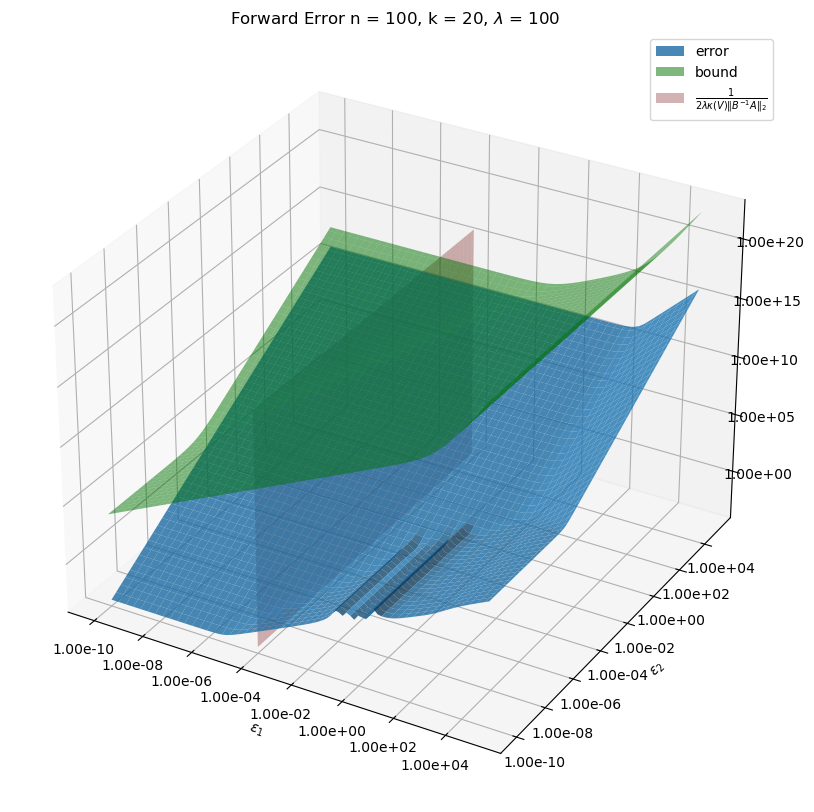

In [43]:
# Create the 3D plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
Errors = errors.T
Bounds = bounds.T

# Plot the surfaces with different colormaps
surface1 = ax.plot_surface(np.log10(E1), np.log10(E2), np.log10(Errors), color = '#1f77b4', alpha=0.8,label='error')
surface2 = ax.plot_surface(np.log10(E1), np.log10(E2), np.log10(Bounds), color = 'green', alpha=0.5,label='bound')

# ax.scatter(np.log10(e1_used/A_inv_norm), np.log10(e2_used/Z_norm), np.log10(errors.flatten()), s=10, label='errors')
# ax.scatter(np.log10(e1_used/A_inv_norm), np.log10(e2_used/Z_norm), np.log10(bounds.flatten()), s=10, label='bounds')


# Customize the plot
ax.set_xlabel(r'$\epsilon_1$')
ax.set_ylabel(r'$\epsilon_2$')
# plt.title(f'Backward Error n = {n}, '+r'$\lambda$'+f' = {lamda}, k = {k}, '+r'$\epsilon_1$'+f' = {e1}')
# ax.set_title(r'Forward Error as a function of $\epsilon_1$ and $\epsilon_2$')
ax.set_title(f'Forward Error n = {n}, k = {k}, '+r'$\lambda$'+f' = {lamda}')
def log_tick_formatter(val, pos=None):
    return "{:.2e}".format(10**val)

ax.xaxis.set_major_formatter(mticker.FuncFormatter(log_tick_formatter))
ax.yaxis.set_major_formatter(mticker.FuncFormatter(log_tick_formatter))
ax.zaxis.set_major_formatter(mticker.FuncFormatter(log_tick_formatter))

x_value = np.log10(1/2/lamda/cond(V)/norm(inv(B)@A,ord=2))
y_range = np.linspace(np.min(np.log10(e2_used)), np.max(np.log10(e2_used)), 100)
z_range = np.linspace(np.min(np.log10(errors.flatten())), np.max(np.log10(errors.flatten())), 100)
Y, Z = np.meshgrid(y_range, z_range)
X = np.full_like(Y, x_value)

# # Plot the surface
ax.plot_surface(X, Y, Z, color='red', alpha=0.3,label = r'$\frac{1}{2 \lambda \kappa(V)\|B^{-1}A\|_2}$')

# Add a color bar for each surface
# fig.colorbar(surface1, ax=ax, shrink=0.5, aspect=5, label='Errors')
# fig.colorbar(surface2, ax=ax, shrink=0.5, aspect=5, label='Bounds')

# Show plot
plt.legend()
plt.savefig('forward_surface/'+title_str+'.png')


